In [106]:
import numpy as np                 # import numpy
import matplotlib.pyplot as plt    # import matplotlib
import statistics

fig_w, fig_h = (8, 6)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [4]:
# HH model

def HH(dt=0.1, gkmax = 0.36, vk = -77, gnamax = 1.2,
       vna = 50, gl = 0.003, vl= -54.387, cm = 0.010,
       v = -64.9, m = 0.053, h = 0.5960, n = 0.317, 
       I = 0.05, n_iter = 1000):

    # Constrcuting the arrays for storign the data as the model evolves
    time = np.array([*range(n_iter)])*dt
    iapp = np.ones(n_iter)*I

    gnahist = np.zeros(n_iter)
    gkhist = np.zeros(n_iter)

    vhist = np.zeros(n_iter)
    mhist = np.zeros(n_iter)
    hhist = np.zeros(n_iter)
    nhist = np.zeros(n_iter)


    # Evolving the model
    for index in range(n_iter):
        gna = gnamax* (m**3) * h
        gk  = gkmax* (n**4)
        gtot = gna + gk + gl

        gnahist[index] = gna
        gkhist[index]  = gk

        # New value of v
        vinf = (gna*vna + gk*vk + iapp[index])/gtot
        tauv = cm/gtot
        v = vinf + (v-vinf)* np.exp(-dt/tauv)        
        vhist[index] = v

        # For the factor m
        alpham = 0.1*(v + 40)/(1- np.exp(-0.1*(v+40)))
        betam = 4*np.exp(-0.0556*(v+65))
        taum = 1/(alpham + betam)
        minf = alpham*taum

        m = minf+(m-minf)*np.exp(-dt/taum)
        mhist[index] = m

        # For the factor n
        alphan = 0.01*(v+55)/(1-np.exp(-0.1*(v+55)))
        betan = 0.125*np.exp(-0.1*(v+65)/8)
        taun = 1/(alphan + betan)
        ninf = alphan*taun

        n = ninf+(n-ninf)*np.exp(-dt/taun)
        nhist[index] = n

        # For the factor h
        alphah = 0.07*np.exp(-0.05*(v+65))
        betah = 1/(1+np.exp(-0.1*(v+35)))
        tauh = 1/(alphah + betah)
        hinf = alphah*tauh

        h = hinf+(h-hinf)*np.exp(-dt/tauh)
        hhist[index] = h
        
        hist = [mhist, nhist, hhist]
    
    return vhist, iapp, time , hist


In [5]:
vhist, iapp ,time , hists  = HH(I = 1)

Text(0, 0.5, 'I (mA)')

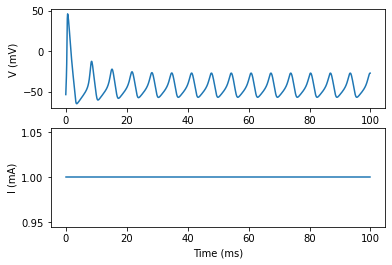

In [6]:
plt.subplot(2,1,1)

plt.plot(time, vhist)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')

plt.subplot(2,1,2)

plt.plot(time, iapp)
plt.xlabel('Time (ms)')
plt.ylabel('I (mA)')

# plt.savefig("HHi4.pdf")

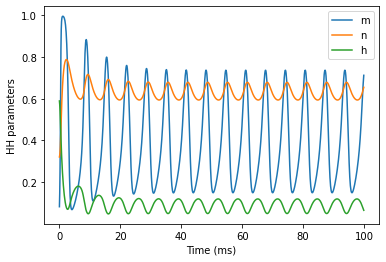

In [7]:
plt.plot(time, hists[0], label = "m")

plt.plot(time, hists[1], label = "n")

plt.plot(time, hists[2], label = "h")

plt.xlabel('Time (ms)')
plt.ylabel('HH parameters')

plt.legend()

# plt.savefig("HHp4.pdf")

# Used the I (microA)
1  = 0.001,
2  = 0.01,
3  = 0.1,
4  = 1,
5  = 5

b) Current, Maximum and Minimum Frequency

In [31]:

def HH_c(I, dt=0.1, gkmax = 0.36, vk = -77, gnamax = 1.2,
       vna = 50, gl = 0.003, vl= -54.387, cm = 0.010,
       v = -64.9, m = 0.053, h = 0.5960, n = 0.317, n_iter = 1000):
     
    n_iter = len(I)
    # Constrcuting the arrays for storign the data as the model evolves
    time = np.array([*range(n_iter)])*dt
    #iapp = np.ones(n_iter)*I

    gnahist = np.zeros(n_iter)
    gkhist = np.zeros(n_iter)

    vhist = np.zeros(n_iter)
    mhist = np.zeros(n_iter)
    hhist = np.zeros(n_iter)
    nhist = np.zeros(n_iter)
    
    spike_time = []
    bool = True

    # Evolving the model
    for index in range(n_iter):
        
        #time.append(index)
        
        gna = gnamax* (m**3) * h
        gk  = gkmax* (n**4)
        gtot = gna + gk + gl

        gnahist[index] = gna
        gkhist[index]  = gk

        # New value of v
        vinf = (gna*vna + gk*vk + I[index])/gtot
        tauv = cm/gtot
        v = vinf + (v-vinf)* np.exp(-dt/tauv)
        
        if index != 0:
            if v < vhist[index-1] and bool and v > -20:
                spike_time.append(index*dt)
                bool = False
            if v > vhist[index-1] and not bool:
                bool = True
        
        vhist[index] = v
        


        # For the factor m
        alpham = 0.1*(v + 40)/(1- np.exp(-0.1*(v+40)))
        betam = 4*np.exp(-0.0556*(v+65))
        taum = 1/(alpham + betam)
        minf = alpham*taum

        m = minf+(m-minf)*np.exp(-dt/taum)
        mhist[index] = m

        # For the factor n
        alphan = 0.01*(v+55)/(1-np.exp(-0.1*(v+55)))
        betan = 0.125*np.exp(-0.1*(v+65)/8)
        taun = 1/(alphan + betan)
        ninf = alphan*taun

        n = ninf+(n-ninf)*np.exp(-dt/taun)
        nhist[index] = n

        # For the factor h
        alphah = 0.07*np.exp(-0.05*(v+65))
        betah = 1/(1+np.exp(-0.1*(v+35)))
        tauh = 1/(alphah + betah)
        hinf = alphah*tauh

        h = hinf+(h-hinf)*np.exp(-dt/tauh)
        hhist[index] = h
        
        hist = [mhist, nhist, hhist]
    
    return vhist, hist, time, spike_time


In [79]:
frequency = []
current_sp = []

In [92]:
I_range =  np.arange(0, 5, 0.001)
I_range = I_range + GWN(sig=1.5, myseed=404, I_len= len(I_range))*0.001

In [93]:
vhist, hists , time, spikes = HH_c(I_range)  # Set for microA

In [94]:
# Making frequency list from spikes

time_diffs = []
time_diffs.append(0.1)

for i in range(len(spikes)-1):
    time_diffs.append(spikes[i+1] - spikes[i])
    
freq = []

for i in range(len(time_diffs)):
    if i == 0:
        freq.append(1/time_diffs[i+1])
        continue
    freq.append(1/time_diffs[i])
    
# print(len(spikes))
# print(len(freq))
# print(len(I_range))

# print(len(time))

current_spike = []

for i in spikes:
    j = np.where(time == i)[0][0]
    current_spike.append(I_range[j])
    
    
# print(len(current_spike))

Text(0, 0.5, 'I (mA)')

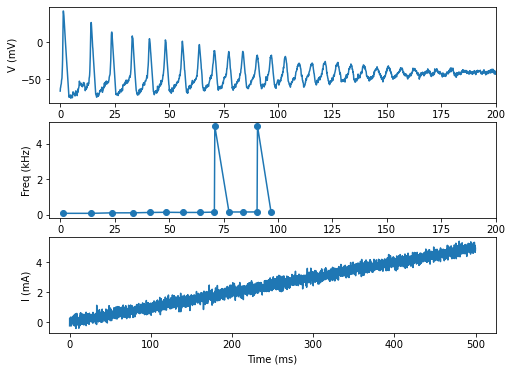

In [71]:
plt.subplot(3,1,1)

plt.plot(time, vhist)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')
plt.xlim(-5,200)

plt.subplot(3,1,2)

plt.plot(spikes, freq, 'o-')
plt.xlabel('Time (ms)')
plt.ylabel('Freq (kHz)')
plt.xlim(-5,200)

plt.subplot(3,1,3)

plt.plot(time, I_range)
plt.xlabel('Time (ms)')
plt.ylabel('I (mA)')

#plt.savefig("HHL_limits.pdf")

In [95]:
frequency.append(freq)
current_sp.append(current_spike)

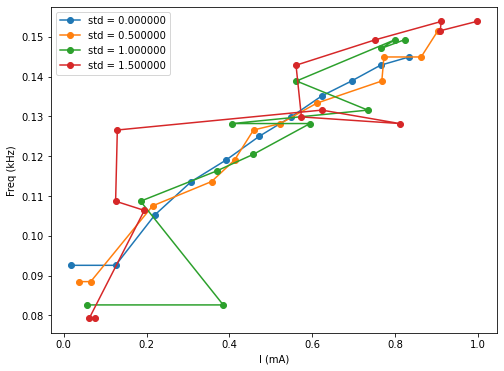

In [98]:
std = [0,0.5,1,1.5]
for i in range(len(std)):
    plt.plot(current_sp[i], frequency[i], 'o-', label = "std = %f" % std[i] )
plt.xlabel('I (mA)')
plt.ylabel('Freq (kHz)')
plt.legend()

#plt.savefig("HH_nfi.pdf")

In [131]:
I_range = np.zeros(1500)

start = 30
end  = start + 1020

amplitude = -0.12

for i in range(start, end):
    I_range[i] = amplitude

#print(I_range)
I_range_un = np.zeros(1500)

In [133]:
vhist_in, hists_in , time_in, spikes_in = HH_c(I_range)  # Set for microA
vhist_un, hists_un , time_un, spikes_un = HH_c(I_range_un)  # Set for microA

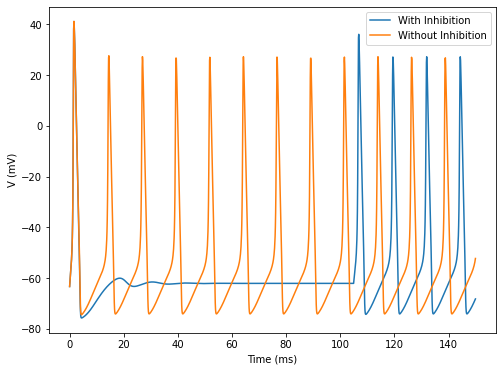

In [138]:
plt.plot(time_in, vhist_in, label = "With Inhibition")
plt.plot(time_un, vhist_un, label = "Without Inhibition")
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')
plt.legend()

plt.savefig("HHL_in_V.pdf")

Used the inhibition period = 100ms

Used inhibition current = 0.12microA

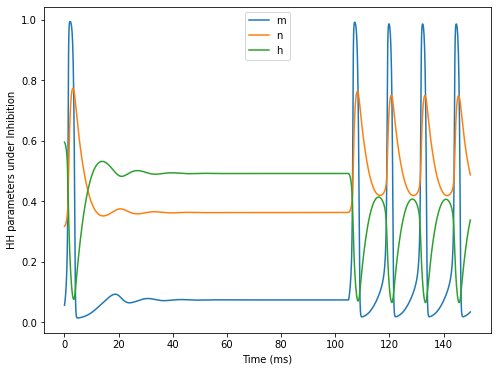

In [139]:
plt.plot(time, hists_in[0], label = "m")

plt.plot(time, hists_in[1], label = "n")

plt.plot(time, hists_in[2], label = "h")

plt.xlabel('Time (ms)')
plt.ylabel('HH parameters under Inhibition')

plt.legend()

plt.savefig("HHL_in_para.pdf")

Doing irregularity and CV ISI

In [3]:
def GWN(sig, myseed=False, 
          dt = 0.1, I_len = 1000):

    # set random seed
    if myseed:
        np.random.seed(seed=myseed) 
    else:
        np.random.seed()
        
    #generate GWN
    I =  sig * np.random.randn(I_len) / np.sqrt(dt/1000.)
    
    return I

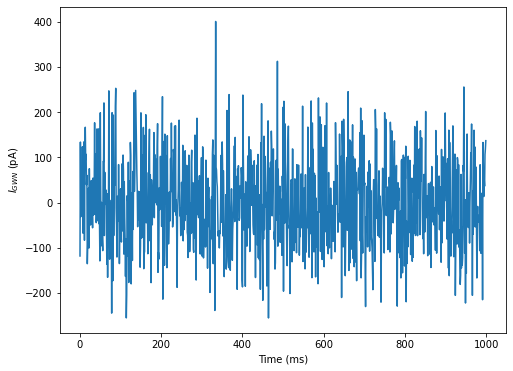

In [18]:
# Checking code and what not
I_GWN = GWN(sig=1, myseed=404, I_len= 1000)
plt.plot(I_GWN)
plt.xlabel('Time (ms)')
plt.ylabel(r'$I_{GWN}$ (pA)');

Text(0, 0.5, 'V (mV)')

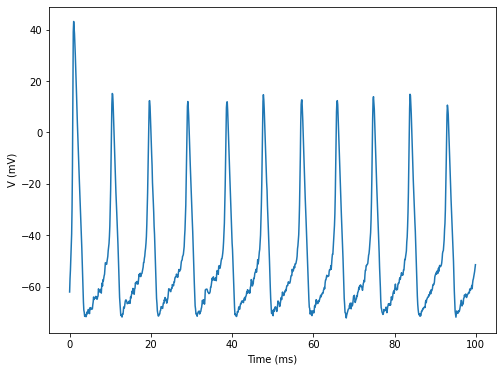

In [25]:
# PLotting that code then
vhist, _, time, spikes  = HH_c(I = (I_GWN + 250)*0.001 ) # Set for microA
plt.plot(time, vhist)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')

In [103]:
I_mean = np.arange(100,500,50)

I_std = np.arange(0.,40,8)
spk_count = np.zeros((len(I_mean),len(I_std)))
cv_isi = [] # np.empty((len(I_mean),len(I_std)))
#cv_isi[:] = np.NaN

frequency = []
I_noise = []

for i in range(len(I_mean)):
    for j in range(len(I_std)):
        I_GWN = GWN(sig=I_std[j], myseed=2000, I_len =1500)
        
        In = np.zeros(1500)
        for k in range(1500):
            In[k] = (I_GWN[k] + I_mean[i]) *0.001
            

        volt, _, time, spikes = HH_c(I=In)
        spk_count[i,j] = len(spikes)
        
        
        time_diffs = []
        time_diffs.append(0.1)

        for p in range(len(spikes)-1):
            time_diffs.append(spikes[p+1] - spikes[p])

        freq = []
        for q in range(len(time_diffs)):
            if q == 0:
                freq.append(1/time_diffs[q+1])
                continue
            freq.append(1/time_diffs[q])
            
        current_spike = []

        for q in spikes:
            p = np.where(time == q)[0][0]
            current_spike.append(In[p])
        
        I_noise.append(current_spike)
        frequency.append(freq)
        
#       isi = np.diff(spikes)
        cv_isi.append(np.std(time_diffs)/np.mean(isi))
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 576x432 with 0 Axes>

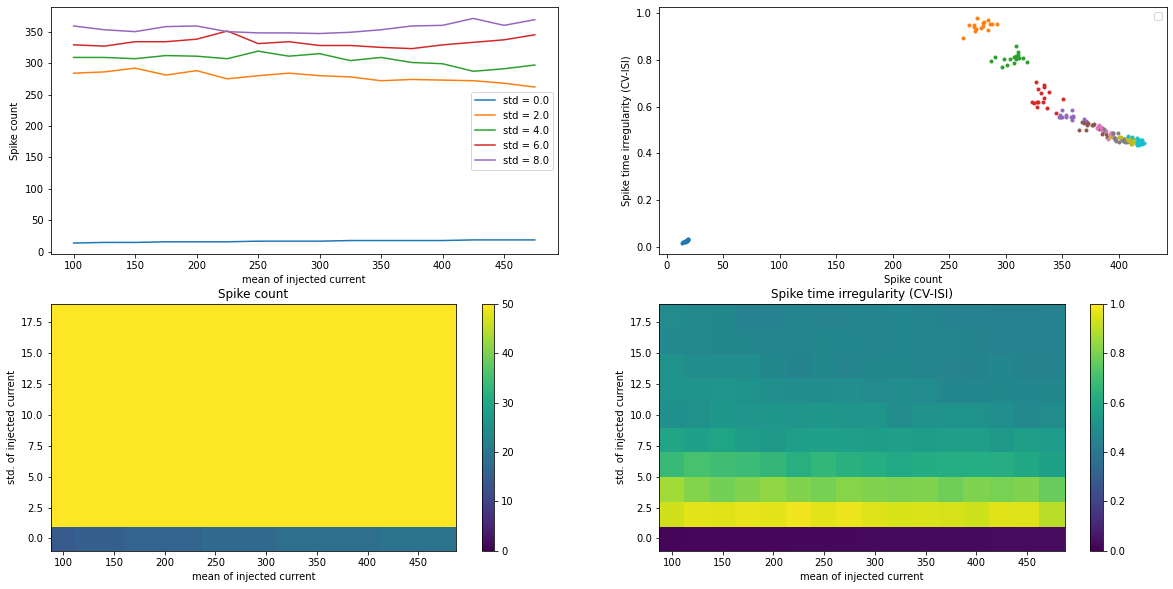

In [29]:
plt.figure()
plt.figure(figsize=(20, 10))

# Plot the F-I curve i.e. Output firing rate as a function of input mean. Different lines correspond to different std. 
# Note how std changes the F-I curve
plt.subplot(2,2,1)
for i in range(5):
    plt.plot(I_mean,spk_count[:,i],label='std = '+str(I_std[i]))
plt.ylabel('Spike count')
plt.xlabel('mean of injected current');
plt.legend()

# Plot firing rate vs coeffcient of variance of inter-spike interval
# Do you see any pattern here? 
plt.subplot(2,2,2)
plt.plot(spk_count,cv_isi,'.')
plt.xlabel('Spike count')
plt.ylabel('Spike time irregularity (CV-ISI)');
plt.legend()

# Plot Firing rate as a function of both mean and std. Firing rate is rendered as color
plt.subplot(2,2,3)
plt.pcolor(I_mean,I_std,spk_count.T)
plt.ylabel('std. of injected current')
plt.xlabel('mean of injected current');
plt.colorbar()
plt.clim(0,50)
plt.title('Spike count');

# Plot Spike time irregularity (CV_ISI) as a function of both mean and std. CV_isi is rendered as color
plt.subplot(2,2,4)
plt.pcolor(I_mean,I_std,cv_isi.T)
plt.ylabel('std. of injected current')
plt.xlabel('mean of injected current');
plt.colorbar()
plt.clim(0,1)
plt.title('Spike time irregularity (CV-ISI)');

#plt.savefig("CV_HH.pdf")